In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


In [185]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [186]:
df=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')

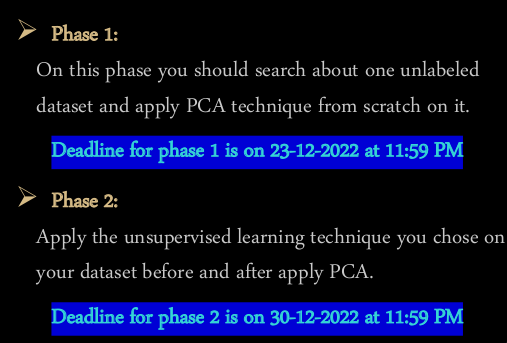

In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
len(df.columns)

9

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


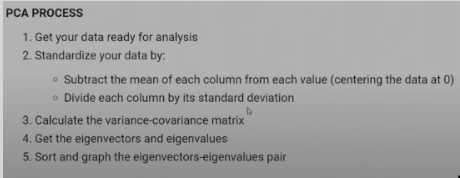

In [190]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [191]:
X=df.drop(df[['Outcome']],axis=1)
y=df['Outcome']

In [192]:

# X=X.iloc[:150]
# y=y.iloc[:150]

In [193]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [194]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)
print(X.shape)
print (X_meaned.shape)

     Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
0       2.154948  27.105469       2.894531      14.463542  -79.799479   
1      -2.845052 -35.894531      -3.105469       8.463542  -79.799479   
2       4.154948  62.105469      -5.105469     -20.536458  -79.799479   
3      -2.845052 -31.894531      -3.105469       2.463542   14.200521   
4      -3.845052  16.105469     -29.105469      14.463542   88.200521   
..           ...        ...            ...            ...         ...   
763     6.154948 -19.894531       6.894531      27.463542  100.200521   
764    -1.845052   1.105469       0.894531       6.463542  -79.799479   
765     1.154948   0.105469       2.894531       2.463542   32.200521   
766    -2.845052   5.105469      -9.105469     -20.536458  -79.799479   
767    -2.845052 -27.894531       0.894531      10.463542  -79.799479   

           BMI  DiabetesPedigreeFunction        Age  
0     1.607422                  0.155124  16.759115  
1    -5.392578 

In [195]:
#2- Calc Covariance Matrix
cov_mat = np.cov(X_meaned , rowvar = False) 
print (cov_mat.shape)
print (cov_mat)

(8, 8)
[[ 1.13540563e+01  1.39471307e+01  9.21453818e+00 -4.39004101e+00
  -2.85552307e+01  4.69774181e-01 -3.74259714e-02  2.15706198e+01]
 [ 1.39471307e+01  1.02224831e+03  9.44309556e+01  2.92391827e+01
   1.22093580e+03  5.57269867e+01  1.45487481e+00  9.90828054e+01]
 [ 9.21453818e+00  9.44309556e+01  3.74647271e+02  6.40293962e+01
   1.98378412e+02  4.30046951e+01  2.64637574e-01  5.45234528e+01]
 [-4.39004101e+00  2.92391827e+01  6.40293962e+01  2.54473245e+02
   8.02979941e+02  4.93738694e+01  9.72135546e-01 -2.13810232e+01]
 [-2.85552307e+01  1.22093580e+03  1.98378412e+02  8.02979941e+02
   1.32811801e+04  1.79775172e+02  7.06668051e+00 -5.71432903e+01]
 [ 4.69774181e-01  5.57269867e+01  4.30046951e+01  4.93738694e+01
   1.79775172e+02  6.21599840e+01  3.67404687e-01  3.36032992e+00]
 [-3.74259714e-02  1.45487481e+00  2.64637574e-01  9.72135546e-01
   7.06668051e+00  3.67404687e-01  1.09778638e-01  1.30771687e-01]
 [ 2.15706198e+01  9.90828054e+01  5.45234528e+01 -2.13810232e

In [196]:
# cov_matrix = pd.DataFrame.cov(df)
# sns.heatmap(cov_mat, annot=True, fmt='g')
# plt.show()

In [197]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]


[7 6 5 4 3 2 1 0]


In [232]:
X_reduced=[]
for n_components in [2,3,4,6,7]:
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    X_reduced.append( np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose())

In [233]:
X_reduced[0].shape

(768, 2)

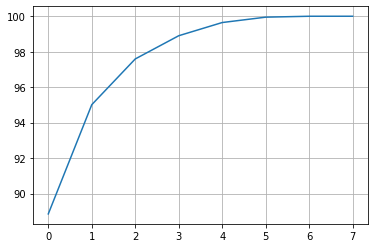

In [200]:
from sklearn.decomposition import PCA
import plotly.express as px
pca_ = PCA()
pca_.fit_transform(X)
plt.grid(True)
plt.plot(np.cumsum(pca_.explained_variance_ratio_ * 100))

In [288]:
X_reduced_2=X_reduced[0]

* ***DBSCAN ALGORITHM***

In [315]:
from scipy.spatial import distance
def calculate_distance(data):
    distance_matrix=np.zeros((data.shape[0],data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(i):
            distance_matrix[i][j],distance_matrix[j][i]= distance.euclidean(data[i],data[j]), distance.euclidean(data[i],data[j])
    return distance_matrix
distance_matrix=calculate_distance(X_reduced_2)

In [316]:
distance_matrix 

array([[  0.        ,  65.19836603,  31.97409462, ..., 114.77584259,
         22.22506372,  57.84336141],
       [ 65.19836603,   0.        ,  97.12262449, ..., 117.2841697 ,
         43.1475223 ,   7.36199664],
       [ 31.97409462,  97.12262449,   0.        , ..., 128.35706767,
         54.00989731,  89.77667033],
       ...,
       [114.77584259, 117.2841697 , 128.35706767, ...,   0.        ,
        113.69238501, 114.87939784],
       [ 22.22506372,  43.1475223 ,  54.00989731, ..., 113.69238501,
          0.        ,  35.82421348],
       [ 57.84336141,   7.36199664,  89.77667033, ..., 114.87939784,
         35.82421348,   0.        ]])

In [317]:
def neighbours_(idx_point,distance_matrix,epslion):
    neighbours=[]
    for i in range(distance_matrix.shape[0]):
        if distance_matrix[idx_point][i]<=epslion and idx_point!=i:
            neighbours.append(i)
    return neighbours,len(neighbours)

In [318]:
def expand_(data,clusters,min_point,current,i,epsilon,neighbours,distance_matrix,visited):    
    for j in neighbours:
        if clusters[j]==-1 or clusters[j]==-2 or not visited[j]:
            neighbour_of_core_point,lenn=neighbours_(j,distance_matrix,epsilon)
#             if lenn >= min_point :
            for neigh in neighbour_of_core_point:
                if not visited[neigh]:
                    clusters[j]=current
#                     neighbours += [neigh]
                    visited[neigh]=True
                    clusters,visited=expand_(data,clusters,min_point,current,i,epsilon,neighbour_of_core_point,distance_matrix,visited)
                else:
                    continue
        #                 print(neighbours)
#         print(len(neighbours))
    return clusters,visited

In [319]:
epsilon = [0.1,0.2,0.3,0.5, 0.7]
# print(epsilon)
eps=np.random.uniform(low=0.01, high=0.05, size=(10,))
eps=np.concatenate((eps, np.random.uniform(low=0.05, high=0.1, size=(10,))), axis=None)
min_point = [x for x in range(4,40,2)]

In [320]:
def DBSCAN(epsilon,min_point,data,distance_matrix):
    #current class equal zero
    visited=np.array([False for i in range(distance_matrix.shape[0])])
    current = 0 
    length = data.shape[0]
    clusters = [-1 for x in range (length)]
    for i in range(length):
        if clusters[i] is not -1:
            continue
        neighbours,num_of_neighbours=neighbours_(i,distance_matrix,epsilon)
        if num_of_neighbours < min_point :
            clusters[i]=-2 # it means this point till now is noisy point
        else:
            clusters[i]=current
            clusters,visited = expand_(data,clusters,min_point,current,i,epsilon,neighbours,distance_matrix,visited)
            current+=1
    return clusters

In [373]:
clusters=np.unique(np.array(DBSCAN(15,4,X_reduced_2,distance_matrix)))
g=np.array(DBSCAN(15,4,X_reduced_2,distance_matrix))
g_ = [g[np.argwhere(g==k)] for k in clusters]
g__ = [np.array(k) for k in g_ if len(k)>5]

In [374]:
for cluster in g__:
    print(cluster.shape)

(74, 1)
(673, 1)
(6, 1)


In [375]:
X_=np.array(X_meaned)
distance_matrix_=calculate_distance(X_)
clusters_n=np.unique(np.array(DBSCAN(15,4,X_,distance_matrix_)))
n_g=np.array(DBSCAN(15,4,X_,distance_matrix))
n_g_ = [g[np.argwhere(g==k)] for k in clusters_n]
n_g__ = [np.array(k) for k in g_ if len(k)>5]

In [376]:
for cluster in n_g__:
    print(cluster.shape)

(74, 1)
(673, 1)
(6, 1)
